In [6]:
import numpy as np 
from qiskit import QuantumRegister, QuantumCircuit, execute, Aer 
from datetime import datetime
from qiskit.utils import algorithm_globals
import torch

from qiskit.primitives import Sampler
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import SamplerQNN

from torch import nn
from torch.optim import Adam


## First Steps 

- Do reading on quantum machine learning and quantum neural networks (QNNs): EstimatorQNN versus SamplerQNN
    - optimiser: use Adam algorithm (??) 
    - loss: use mean squared error (MSE)? 
    - KIND OF A REGRESSION TASK? 
    - DOES NOT REALLY FIT WITH MOST EXISTING ALGORITHMS, WHICH OUTPUT CLASSICAL DATA NOT QUANTUM STATES!!

    - how to feed in input register without collapsing or measuring??

LOOK FOR "VARIATIONAL QA" INSTEAD OF "QUANTUM MACHINE LEARNING" ?   

    - use twolocal param circuit or smth 
    - control that with input register 

    - maybe train with random superposition of computational basis states for |x> input? otherwise output |f(x)> will have statevector with 
      all zeros and one 1 which might make loss function rather useless?

   some sort of permutation problem: match computational basis state |x> with |f(x)> ???   


Note: most QML tasks involve classical inputs and outputs, using the quantum layers for intermediate processing. This makes them susceptible to the "input problem" of how to read classical data in and out of quantum computers.     

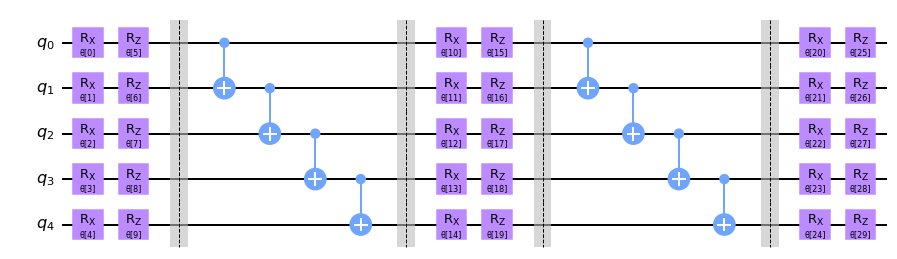

In [7]:
from qiskit.circuit.library import TwoLocal

ansatz = TwoLocal(
    num_qubits=5,
    rotation_blocks=["rx", "rz"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=2,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")